# Project: Data Analysis for Used Cars in Germany

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project will analyze the vehicle market in Germany. The dataset used in the project was scraped and uploaded to Kaggle https://www.kaggle.com/orgesleka/used-cars-database/data, saved as 'auto_kaggle.csv'.

**The data columns description as following:**
- `dateCrawled` - When this ad was first crawled. All field-values are taken from this date.
- `name` - Name of the car.
- `seller` - Whether the seller is private or a dealer.
- `offerType` - The type of listing
- `price` - The price on the ad to sell the car.
- `abtest` - Whether the listing is included in an A/B test.
- `vehicleType` - The vehicle Type.
- `yearOfRegistration` - The year in which which year the car was first registered.
- `gearbox` - The transmission type.
- `powerPS` - The power of the car in PS.
- `model` - The car model name.
- `kilometer` - How many kilometers the car has driven.
- `monthOfRegistration` - The month in which year the car was first registered.
- `fuelType` - What type of fuel the car uses.
- `brand` - The brand of the car.
- `notRepairedDamage` - If the car has a damage which is not yet repaired.
- `dateCreated` - The date on which the eBay listing was created.
- `nrOfPictures` - The number of pictures in the ad.
- `postalCode` - The postal code for the location of the vehicle.
- `lastSeenOnline` - When the crawler saw this ad last online.

**The project amis to answer the following questions:**
> - Question 1: What is the most common brands of cars in Germany and their listed average prices?
> - Question 2: Is kilometer affect listing price among common brand?
> - Question 3: Whether a car's damage repaired or not will affect the listing price?
> - Question 4: What are the most expensive cars in Germany?


<a id='wrangling'></a>
## Data Wrangling

###  Initial Data Exploring and cleaning

In [174]:
# Import library we will use
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np

# Loading data and check information and first 3 rows
autos=pd.read_csv('autos_kaggle.csv', encoding='Latin-1')
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


**Observation**

1. Column names need to be changed. 

2. There are some columns contain null-value data.

3. The `notRepairedDamage` column contains non-English words and need to change to English to undertand.

In [175]:
autos.describe(include='all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


**Observations**:

- `seller` and `offerType` only have 2 unique value, with frequency of 371525, which means most of its data are the same, meanless to analyze, so we can drop it.

- The following columns have odd max and min value: 
    - `price`
    - `yearOfRegistration`
    - `powerPS`
    - `nrOfPictures`

### Step1_1. Clean Columns

In [176]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

Cleaning Strategy:
- Change the columns from camelcase to snakecase.
- Change a few wordings to more accurately describe the columns.

In [177]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'kilometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen']
autos.head(1)

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57


### Step1_2 Investigate the columns with abnormal values and Drop unnecessary columns

In [178]:
autos["num_photos"].value_counts()

0    371528
Name: num_photos, dtype: int64

In [179]:
autos["seller"].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [180]:
autos["offer_type"].value_counts()

Angebot    371516
Gesuch         12
Name: offer_type, dtype: int64

**Observation:**

The "num_photos" column has 0 for every column, 'seller' and 'offer_type' have most of the values the same, so we can drop these columns.

In [181]:
#Drop unnecessary columns
autos = autos.drop(["num_photos", "seller", "offer_type"], axis=1)
autos.head(1)

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57


### Step1_3 Investigate on "price" column

In [182]:
# Find out how many rows with 0 value.
autos["price"].value_counts().sort_index().head()

0    10778
1     1189
2       12
3        8
4        1
Name: price, dtype: int64

**Obervation:**

There are 10778 cars listed with 0 price, given that this is less than 3% of the of the total dataset, we might consider removing these rows. As ebay is an auction site, it is possible to have listing with opening bid $1, so we will keep these. 

In [183]:
# Find out how many rows have extreme large value
autos["price"].value_counts().sort_index(ascending=False).head(20)

2147483647     1
99999999      15
99000000       1
74185296       1
32545461       1
27322222       1
14000500       1
12345678       9
11111111      10
10010011       1
10000000       8
9999999        3
3895000        1
3890000        1
2995000        1
2795000        1
1600000        2
1300000        1
1250000        2
1234566        1
Name: price, dtype: int64

**Obervation:**

There are several listings that have extremely large values; it looks like above 3895000, the price jumped sharply to unrealistic number, but below 3895000, the price is increasing steadily. Although 3895000 is extremely high too, but not imposible for luxury brand. 

Thus we will remove the rows with 0 value and the rows have value above 3895000.

In [184]:
# Remove the rows with 0 value and the rows that have value above 3895000
autos=autos[autos['price'].between(1,3895000)]

### Step1_ 4 Investigating 'registration_year' column

In [185]:
# Find out how many rows with extreme small value.
autos["registration_year"].value_counts(normalize=True).sort_index().head(20)

1000    0.000089
1001    0.000003
1039    0.000003
1111    0.000006
1234    0.000011
1255    0.000003
1300    0.000006
1400    0.000003
1500    0.000008
1600    0.000006
1602    0.000003
1800    0.000014
1910    0.000161
1911    0.000003
1923    0.000008
1925    0.000003
1927    0.000006
1928    0.000006
1929    0.000022
1930    0.000011
Name: registration_year, dtype: float64

In [186]:
# Find out how many rows with extreme large value.
autos["registration_year"].value_counts(normalize=True).sort_index(ascending=False).head(10)

9999    0.000053
9450    0.000003
9000    0.000011
8888    0.000006
8500    0.000003
8200    0.000003
8000    0.000006
7800    0.000003
7777    0.000003
7500    0.000003
Name: registration_year, dtype: float64

**Observation**:

There is no car before 1800 year and the registration year can not be above the listing year 2016, we can consider remove these rows.

In [187]:
# The percentage of our data that has invalid values in this column
(~autos['registration_year'].between(1900,2016)).sum()/autos.shape[0]

0.03875264071328369

There are less than 4% of rows with incorrect data, we can remove these rows.

In [188]:
# Remove rows with value below 1900 and above 2016.
autos=autos[autos['registration_year'].between(1900,2016)]

In [189]:
# Find out which years the majority of cars are registered 
autos["registration_year"].value_counts(normalize=True).head(10)

2000    0.066702
1999    0.063544
2005    0.062670
2006    0.057704
2001    0.056948
2003    0.056547
2004    0.056169
2002    0.054280
2007    0.050490
1998    0.049691
Name: registration_year, dtype: float64

**It appears that most of the vehicles were first registered in the past 20 years.**

### Step1_ 5 Change the non-English value in 'unrepaired_damage' column

In [190]:
autos.unrepaired_damage.value_counts()

nein    252813
ja       33191
Name: unrepaired_damage, dtype: int64

**Strategy**

nein means No in English, and ja means Yes, we will change it to False and True as a Boolean value to easily analyze.**

In [191]:
mapping_dict={'nein':False, 'ja':True}
autos['unrepaired_damage']=autos['unrepaired_damage'].map(mapping_dict)
autos['unrepaired_damage'].value_counts(dropna=False)

False    252813
NaN       60716
True      33191
Name: unrepaired_damage, dtype: int64

### Step1_ 6 Investigate Null-values

In [192]:
autos.isnull().sum()

date_crawled              0
name                      0
price                     0
ab_test                   0
vehicle_type          20147
registration_year         0
gearbox               15942
power_ps                  0
model                 16375
kilometer                 0
registration_month        0
fuel_type             24571
brand                     0
unrepaired_damage     60716
ad_created                0
postal_code               0
last_seen                 0
dtype: int64

**Observation**

The columns with null-values are all text value. As our focus is to analyze 'price', 'brand','registration_year' and 'odometer_km', we don't need to remove or fill these null values.

### Step1_ 7 Exploring the date columns

There are a number of columns with date information:

- `date_crawled`
- `registration_month`
- `registration_year`
- `ad_created`
- `last_seen`

These are a combination of dates that were crawled, and dates with meta-information from the crawler. The non-registration dates are stored as strings.



In [193]:
# Convert 'ad_created' data type to date time type.
autos['ad_created']=pd.to_datetime(autos['ad_created'])

In [194]:
# Create a new columns to the year of the ad_created
autos['ad_created_year']=autos['ad_created'].dt.year

In [195]:
# Check which years the ads are created
autos['ad_created_year'].value_counts()

2016    346690
2015        29
2014         1
Name: ad_created_year, dtype: int64

**Most of the ads are listed on 2016**

In [214]:
autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen,ad_created_year
0,2016-03-24 11:52:17,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,70435,2016-04-07 03:16:57,2016
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,True,2016-03-24,66954,2016-04-07 01:46:50,2016
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,90480,2016-04-05 12:47:46,2016
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,False,2016-03-17,91074,2016-03-17 17:40:17,2016
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,False,2016-03-31,60437,2016-04-06 10:17:21,2016


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: What are the common brands of vehicls in Germany and their average price in 2016?

In [196]:
# List of top 10 most frequent brands 
brand_counts=autos['brand'].value_counts(normalize=True)
brand_counts.head(10)

volkswagen       0.211675
bmw              0.109870
opel             0.106397
mercedes_benz    0.096833
audi             0.089536
ford             0.068912
renault          0.047508
peugeot          0.030148
fiat             0.025686
seat             0.018658
Name: brand, dtype: float64

In [197]:
# Select the brands that are more than 5% of the market to analyze
common_brands=brand_counts[brand_counts > .05].index

In [198]:
#Analyze the common brands and its average price
brand_mean_prices = {}

for brand in common_brands:
    brand_only = autos[autos["brand"] == brand]
    mean_price = brand_only["price"].mean()
    brand_mean_prices[brand] = int(mean_price)

brand_mean_prices

{'volkswagen': 5452,
 'bmw': 8573,
 'opel': 3028,
 'mercedes_benz': 8609,
 'audi': 9166,
 'ford': 3779}

In [199]:
# Convert the dictionary to a pandas series and sort its value
mean_prices=pd.Series(brand_mean_prices).sort_values(ascending=False)
mean_prices

audi             9166
mercedes_benz    8609
bmw              8573
volkswagen       5452
ford             3779
opel             3028
dtype: int64

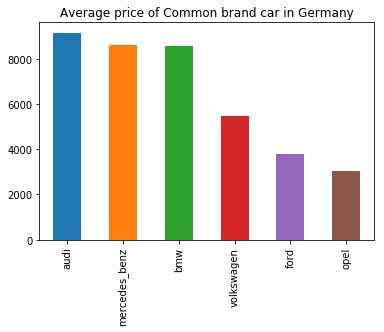

In [200]:
mean_prices.plot(kind='bar', title='Average price of Common brand car in Germany')

### Answer 1:###  

**Volkswagen is the most popular brand, followed by Opel,BMW, Mercedes, Audi and Ford.** 

**Among these popular brands, Audi is the most expensive, followed by Mercedes and BMW. Volkswagen price is in the middle and Ford and Opel are least expensive**. 

### Question 2: Is kilomater a significant factor that affect the car price?

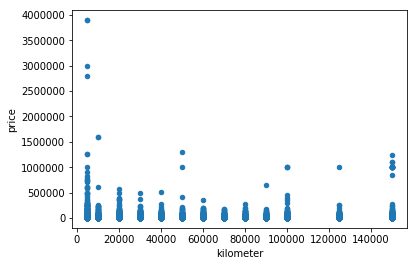

In [212]:
# plot a scotter chart to observe the value of price and kilomater
autos.plot(kind='scatter', x='kilometer', y='price')

**As we can see, when the kilometer, the price has huge range between 1 to 1 millon, and there are also a lot of expensive cars that have driven a significant amount of kilometers. Thus our initial observation shows kilometer is not a significat factor that affect car price. 
We will start analyze how kilometer affect car price among the common brands.**


In [201]:
#Analyze the common brands and its average odometer_km
brand_mean_km = {}

for brand in common_brands:
    brand_only = autos[autos["brand"] == brand]
    mean_km = brand_only["kilometer"].mean()
    brand_mean_km[brand] = int(mean_km)

brand_mean_km

{'volkswagen': 128387,
 'bmw': 132791,
 'opel': 128721,
 'mercedes_benz': 130566,
 'audi': 129440,
 'ford': 123663}

In [202]:
# Convert the dictionary to a pandas series 
mean_km=pd.Series(brand_mean_km)

In [203]:
# Convert pandas series to a data frame 
common_brand_info=pd.DataFrame(mean_prices, columns=['mean_price'])
common_brand_info

,mean_price
audi,9166
mercedes_benz,8609
bmw,8573
volkswagen,5452
ford,3779
opel,3028


In [204]:
# Add the 'mean_km' to the data frame
common_brand_info['mean_km']=mean_km
common_brand_info

,mean_price,mean_km
audi,9166,129440
mercedes_benz,8609,130566
bmw,8573,132791
volkswagen,5452,128387
ford,3779,123663
opel,3028,128721


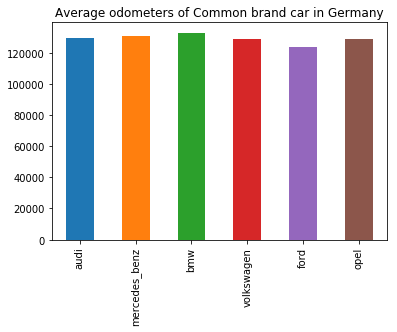

In [205]:
common_brand_info['mean_km'].plot(kind='bar', title='Average odometers of Common brand car in Germany')

### Answer 2:###

**NO. Among these common brands of cars on sale, the average of odometers are all ablove 100000km; The range of car mileages does not vary as much as the prices do by brand.** 

### Question 3: Whether a car's damage repaired or not will affect the listing price?

In [229]:
unrepaired_price=autos.groupby('unrepaired_damage')['price'].mean()
unrepaired_price

unrepaired_damage
False    7319.451970
True     2326.914254
Name: price, dtype: float64

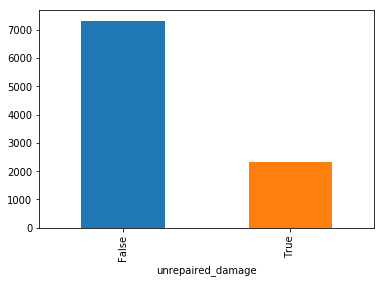

In [228]:
unrepaired_price.plot(kind='bar')

### Answer 3: 

**There is huge price differences between repaied or not, as we can see the cars that were repaired have higher price in average**

### Question 4: What are the most expensive car brands?

In [206]:
# Groupby brands and calculate the average price, sorted and show the top 20.
top_20_expensive=autos.groupby('brand')[['price','kilometer']].mean().sort_values('price', ascending=False).head(20)

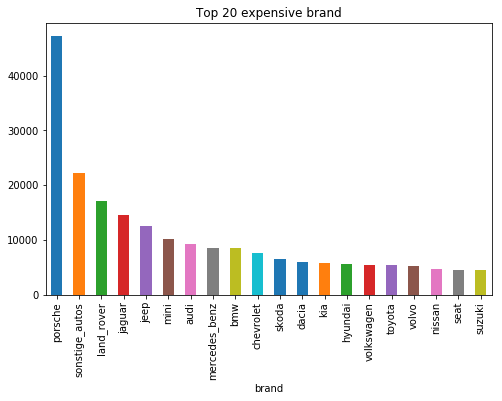

In [207]:
top_20_expensive['price'].plot(kind='bar', title='Top 20 expensive brand', figsize=(8, 5))

### Answer 4:### 

**Porsche is the most expensive brand, followed by 'sonstige_autos', which the brand is unknown, we can furthur analyze the expensive cars in this catergory**

### Other Analysis###

In [208]:
# Find out the name of the top 10 most expensive cars in 'sonstige_autos'
autos[autos['brand']=='sonstige_autos'].sort_values('price', ascending=False)[['name','price', 'registration_year', 'kilometer']].head(10)

,name,price,registration_year,kilometer
366861,Ferrari_FXX__unfallfrei__perfekter_Zustand,3895000,2006,5000
364171,Ferrari_FXX,3890000,2006,5000
41980,Maserati_MC12,2995000,2005,5000
45055,Ferrari_LaFerrari_Deutsche_Auslieferung._A_Cel...,2795000,2016,5000
367041,Maserati_MC12,1600000,2005,10000
333699,Maserati_MC12,1600000,2005,10000
316200,Ferrari_F40,1300000,1992,50000
106651,SUCHE_PKW_MIT_TÜV_MIN2_MONATE,1111111,2000,150000
301198,4_Wochen_und_kein_Ergebnis!_Hilfe!,999999,2015,5000
131785,Suche_Autos_aller_Art,999999,2000,100000


**Most of the cars are Ferrari and Maserati, and the car are relatively newer and kilometer driven are less too.**

<a id='conclusions'></a>
## Conclusion

**The main factors that affect the car price is the brand, and another factor is wether the damage is repaired; the kilometers are not necessarily positively correlated with the car price, it depends on the car brand and type.**

**Volkswagen is the most popular brand, followed by Opel, BMW, Mercedes, Audi and Ford.** 

**Among these popular brands, Audi is the most expensive, followed by Mercedes and BMW. Volkswagen price is in the middle and Ford and Opel are least expensive**. 

**Porsche is the most expensive brand in average, Ferrari, Maserati and other luxury brands are also among expensive ones.** 

**Interestingly, Japanese and South Korean cars are not very popular in Germany**